### Application of Naïve Bayes algorithm on Titanic dataset

**Problem Statement: Predict the survival rate of passengers using naïve bayes algorithm.**

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading the data

In [25]:
df = pd.read_csv('Datasets/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,s_M,S_F,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,0.0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.0,1.0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,NaN,NaN,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,NaN,NaN,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,NaN,NaN,35.0,0,0,373450,8.0500,NaN,S


### Basic EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   s_M          2 non-null      float64
 6   S_F          2 non-null      float64
 7   Age          714 non-null    float64
 8   SibSp        891 non-null    int64  
 9   Parch        891 non-null    int64  
 10  Ticket       891 non-null    object 
 11  Fare         891 non-null    float64
 12  Cabin        204 non-null    object 
 13  Embarked     889 non-null    object 
dtypes: float64(4), int64(5), object(5)
memory usage: 97.6+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,s_M,S_F,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,2.000000,2.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.500000,0.500000,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.707107,0.707107,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.250000,0.250000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.500000,0.500000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,0.750000,0.750000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
s_M            889
S_F            889
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.shape

(891, 14)

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 's_M', 'S_F', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

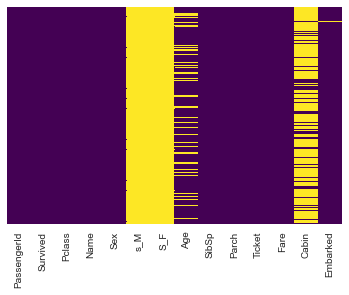

In [27]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

The heatmap for null values shows:-
- The three columns s_M, S_F and Cabin are completely filled with null values and need to be dropped. 
- the feature 'Age' also has a lot of missing values which need to be imputed.

### Imputing missing values

In [28]:
df.drop('Cabin', axis=1, inplace=True)
df.drop('s_M', axis=1, inplace=True)
df.drop('S_F', axis=1, inplace=True)

In [29]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [30]:
df['Age'] = df['Age'].fillna(int(df['Age'].mean()))

In [31]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,29.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [32]:
df.dropna(inplace=True)

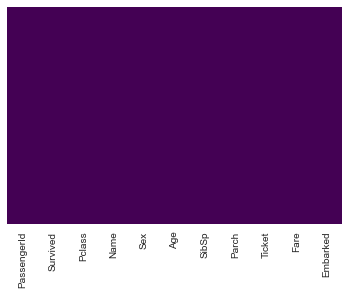

In [33]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

The dataset is now clean and free of null values.

### Converting Categorical features

In [18]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [34]:
sex = pd.get_dummies(df['Sex']).drop(['1','0','female'], axis=1)
sex

,male
0,0
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [20]:
embark = pd.get_dummies(df['Embarked'], drop_first = True)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [22]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [35]:
df.drop(['Sex', 'Embarked', 'Name','Ticket', 'PassengerId'], axis=1, inplace=True)
df = pd.concat([df, sex, embark], axis=1)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,0,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


### Visualization

**Survival count based on gender**

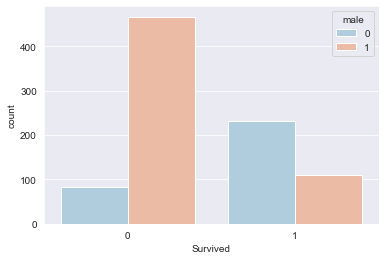

In [39]:
sns.countplot('Survived', hue = 'male', data = df, palette = 'RdBu_r')

**Survival count based on class**

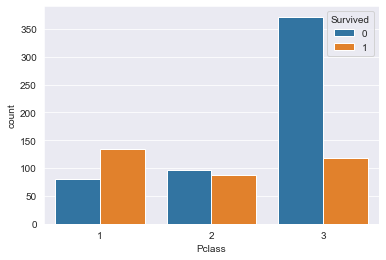

In [43]:
sns.countplot(x="Pclass", data=df, hue="Survived")

### Train-Test split

In [40]:
from sklearn.model_selection import train_test_split

In [44]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,0,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [46]:
x = df.iloc[:,1:9]
y = df['Survived']

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

### Building the Naive Bayes Model

In [57]:
from sklearn.naive_bayes import GaussianNB

In [58]:
GNB = GaussianNB()
GNB.fit(x_train,y_train)

GaussianNB()

In [59]:
pred = GNB.predict(x_test)
pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

### Model Evaluation

In [61]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [62]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, pred))
print('\nClassification Report:')
print(classification_report(y_test, pred))

Confusion Matrix:
[[147  37]
 [ 27  83]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       184
           1       0.69      0.75      0.72       110

    accuracy                           0.78       294
   macro avg       0.77      0.78      0.77       294
weighted avg       0.79      0.78      0.78       294



In [65]:
acc = accuracy_score(y_test, pred)
print('Accuracy of the Naive Bayes Model:', round(acc * 100, 2), "%")

Accuracy of the Naive Bayes Model: 78.23 %
